In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis/sentiment_analysis.csv


In [2]:
import matplotlib.pyplot as plt
import string 
import re
from nltk import sent_tokenize , word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv("/kaggle/input/sentiment-analysis/sentiment_analysis.csv")

In [4]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [6]:
data.describe()

,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


In [7]:
data.shape

(499, 7)

In [8]:
data.isna().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

<Axes: ylabel='count'>

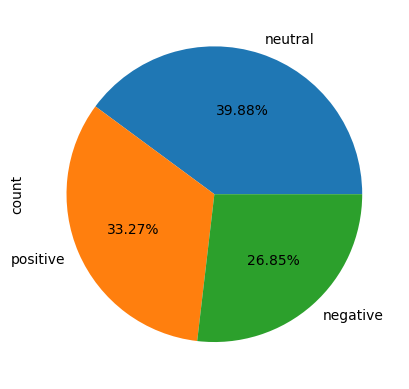

In [9]:
data["sentiment"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")

In [10]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [11]:
df = data.loc[:,("text", "sentiment")]

In [12]:
df.head()

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative


In [13]:
df["total_alphabets"] = df["text"].apply(len)

In [14]:
df.head()

,text,sentiment,total_alphabets
0,What a great day!!! Looks like dream.,positive,37
1,"I feel sorry, I miss you here in the sea beach",positive,46
2,Don't angry me,negative,14
3,We attend in the class just for listening teac...,negative,84
4,"Those who want to go, let them go",negative,33


In [15]:
mean_alpha = [df[df["sentiment"] == "positive"]["total_alphabets"].mean() , df[df["sentiment"] == "negative"]["total_alphabets"].mean() , df[df["sentiment"] == "neutral"]["total_alphabets"].mean()]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


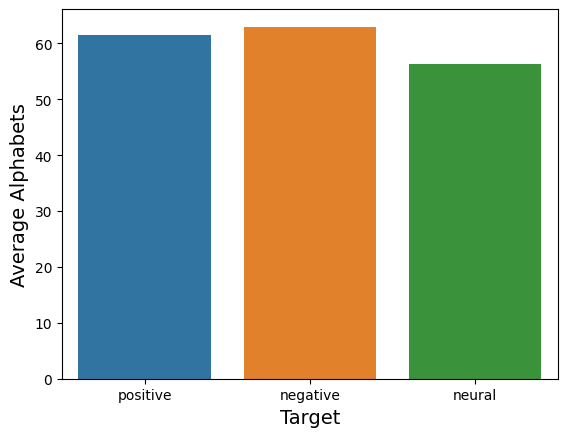

In [16]:
import seaborn as sns
target = ["positive" , "negative" , "neural"]
sns.barplot(x = target ,y = mean_alpha )
plt.xlabel("Target", fontsize = 14)
plt.ylabel("Average Alphabets" , fontsize = 14)
plt.show()

# Text Preprocessing

### Removing punctuation

In [17]:
import string 

punc = string.punctuation

def remove_punctuation(text):
    lst = []
    text = text.lower()
    for word in text:
        if word not in punc:
            lst.append(word)
            
    x = lst[:]
    lst.clear()
    return "".join(x)


df["text"] = df["text"].apply(remove_punctuation)

df.head()

,text,sentiment,total_alphabets
0,what a great day looks like dream,positive,37
1,i feel sorry i miss you here in the sea beach,positive,46
2,dont angry me,negative,14
3,we attend in the class just for listening teac...,negative,84
4,those who want to go let them go,negative,33


### Removing stopwords

In [18]:
stop = stopwords.words("english")

def remove_stopwords(text):
    lst = []
    
    for word in text.split():
        if word not in stop:
            lst.append(word)
            
    x = lst[:
           ]
    lst.clear()
    return " ".join(x)


df["text"] = df["text"].apply(remove_stopwords)

### Applying Stemming

In [19]:
import nltk
ps = PorterStemmer()

def stemming(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in words]
    return " ".join(stemmed_words)

df["text"].apply(stemming)

0                           great day look like dream
1                           feel sorri miss sea beach
2                                          dont angri
3      attend class listen teacher read slide nonsenc
4                                      want go let go
                            ...                      
494            accord quarter famili six live poverti
495                          plan spend money go well
496                   upload bamboozl pictur facebook
497             congratul guy finish month earli booo
498                        actual wish back taho miss
Name: text, Length: 499, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df["text"]

y = le.fit_transform(df["sentiment"])


## Train test split

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test = train_test_split(df["text"] , y , train_size = 0.8 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399,)
(100,)
(399,)
(100,)


# Word Embedding :- Count Vectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range = (1,2) , max_features = 2500 ,binary = True)

In [23]:
X_train_bow= cv.fit_transform(X_train).toarray()

X_test_bow = cv.transform(X_test).toarray()

In [24]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(399, 2500)
(100, 2500)


In [25]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

mnb.fit(X_train_bow , y_train)

y_pred_mnb = mnb.predict(X_test_bow)

print(accuracy_score(y_test , y_pred_mnb))

0.62


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_bow , y_train)
y_pred_rf = rf.predict(X_test_bow)
print(accuracy_score(y_test , y_pred_rf))

0.63


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb.fit(X_train_bow , y_train)

y_pred = gb.predict(X_test_bow)

print(accuracy_score(y_test , y_pred))

0.62


# Word Embedding :- Tf-idf Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range = (1,2) , max_features = 2500 ,binary = True)

X_train_bow= tfidf.fit_transform(X_train).toarray()

X_test_bow = tfidf.transform(X_test).toarray()

In [29]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(399, 2500)
(100, 2500)


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

mnb.fit(X_train_bow , y_train)

y_pred = mnb.predict(X_test_bow)

print(accuracy_score(y_test , y_pred))

0.66


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_bow , y_train)
y_pred_rf = rf.predict(X_test_bow)
print(accuracy_score(y_test , y_pred_rf))

0.63


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb.fit(X_train_bow , y_train)

y_pred = gb.predict(X_test_bow)

print(accuracy_score(y_test , y_pred))

0.59


# Word Embedding :- Word2Vec

In [33]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [34]:
## Importing Google pre- trained model

import gensim.downloader as api

wv = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [35]:
##Preprocessing
X = df["text"]

story = []

for doc in X:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [36]:
model = gensim.models.Word2Vec(
    window = 9,
    min_count = 2
)

In [37]:
model.build_vocab(story)

In [38]:
model.train(story , total_examples = model.corpus_count , epochs = model.epochs)

(10320, 15765)

In [39]:
len(model.wv.index_to_key)

607

In [40]:
def document_vector(doc):
    
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    if doc:
        vectors = [model.wv[word] for word in doc]
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)      

In [41]:
document_vector(df["text"].values[0])

array([-1.7927326e-03,  6.1333214e-04, -2.3828670e-03, -6.0335768e-04,
       -1.1778030e-03, -2.6614293e-03, -8.9925749e-04,  3.6697728e-03,
       -7.0688650e-03, -2.0952842e-03,  2.7145739e-03, -2.8839160e-03,
       -4.5837741e-03,  8.9359208e-04, -1.5106499e-03, -1.7696597e-03,
        1.3708300e-03, -3.7467531e-03, -1.0105723e-03, -1.1287294e-03,
        8.5104664e-04, -9.9795870e-06,  2.4691552e-03,  1.0656455e-03,
       -2.1620330e-03, -6.2030274e-04, -1.2287010e-03, -2.7764947e-03,
        1.8785611e-03,  1.8180136e-03,  4.7082142e-03, -7.4523804e-04,
        7.4735784e-04, -3.8321472e-03, -1.6725910e-04,  5.2142488e-03,
        2.8155581e-03,  4.6209008e-03,  3.3537969e-03, -1.1684441e-03,
        2.5816525e-03, -3.5162289e-03, -8.0145022e-04,  8.1375538e-04,
       -2.1558576e-03,  1.3817006e-03,  3.5134915e-03,  9.3517156e-04,
       -1.2909949e-03,  9.7452867e-04, -1.4234763e-03, -3.8722090e-03,
        4.9633845e-03,  1.1758107e-03,  2.1257489e-03,  1.5848319e-03,
      

In [42]:
from tqdm import tqdm

x = []
for doc in tqdm(df['text'].values):
    x.append(document_vector(doc))

100%|██████████| 499/499 [00:00<00:00, 14975.05it/s]


In [43]:
x = np.array(x)

print(x.shape)

(499, 100)


In [44]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test = train_test_split(x , y , train_size = 0.8 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 100)
(100, 100)
(399,)
(100,)


In [45]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train , y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test , y_pred))

0.63


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier()

gb.fit(X_train , y_train)

y_pred = gb.predict(X_test)

print(accuracy_score(y_test , y_pred))

0.62


In [47]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

ab = GradientBoostingClassifier()

ab.fit(X_train , y_train)

y_pred = ab.predict(X_test)

print(accuracy_score(y_test , y_pred))

0.59
